In [36]:
import sys
import os
home = os.environ['HOME']
sys.path.append(home + '/projects/turbubox/tools/lib')
sys.path.append(home + '/projects/turbubox/tools')

import numpy as np
import pandas as pd
import glob
import cubicle
import turbubox.ulz as ulz

import scipy.interpolate

import matplotlib
matplotlib.rcParams.update({'font.size': 9})

import matplotlib.pyplot as plt
%matplotlib inline
import gausslobatto

dpi = 100
fac = 0.8
geo = (fac*1920,fac*1080)

from mpl_toolkits.mplot3d import axes3d

In [37]:
fp = '/mnt/data/couchdg/centroid-taylor-expansion/data/chkpt_0001.h5'

fh = cubicle.File(fp)
extent = fh.domain.T.ravel()
extent = np.roll(extent,2)

Nvisu = 2*(fh.npoly+1)

fh.npoly, fh.mpoly, Nvisu

(7, 3, 16)

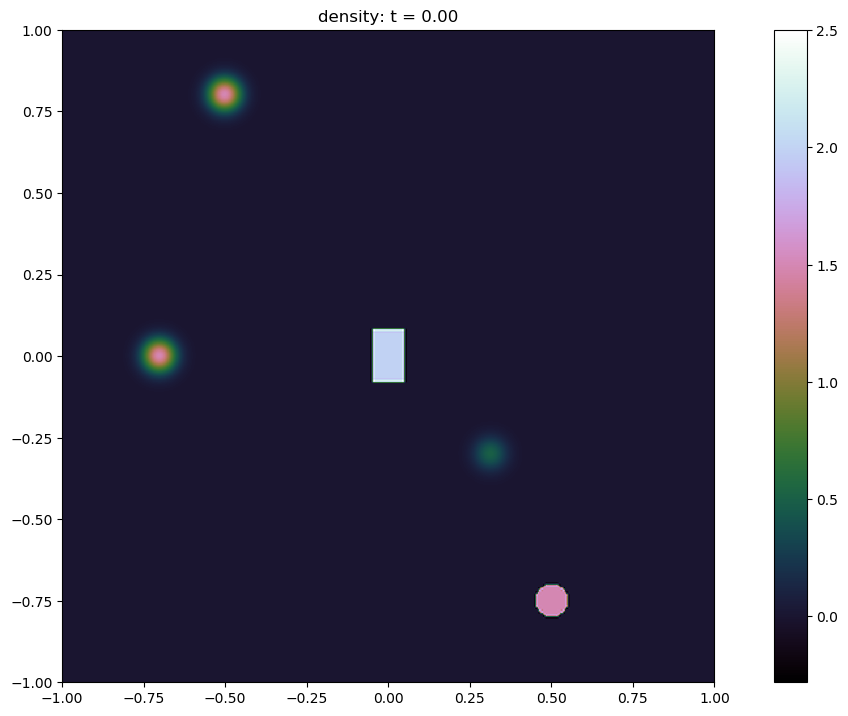

In [38]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)

dens = fh.stitch_structured_2(0,Nvisu=Nvisu,mpoly=fh.mpoly)
#dens = fh.stitch_structured(0,Nvisu=Nvisu)
data = dens


plt.title('density: t = {:.2f}'.format(fh.time))
plt.imshow(
    data,
    extent = extent,
    #vmin = 0,
    #vmax = 15,
    origin='lower',
    interpolation = None,
    cmap = plt.get_cmap('cubehelix'),
)
plt.colorbar()

In [39]:
lvpot = fh.stitch_structured_2(fh.profiles['vpot'],Nvisu=Nvisu,mpoly=fh.mpoly,dname='profile')
svpot = fh.stitch_structured_2(fh.profiles['svpot'],Nvisu=Nvisu,mpoly=fh.mpoly,dname='profile')

laccx = fh.stitch_structured_2(fh.profiles['dvx'],Nvisu=Nvisu,mpoly=fh.mpoly,dname='profile')
laccy = fh.stitch_structured_2(fh.profiles['dvy'],Nvisu=Nvisu,mpoly=fh.mpoly,dname='profile')

saccx = fh.stitch_structured_2(fh.profiles['saccx'],Nvisu=Nvisu,mpoly=fh.mpoly,dname='profile')
saccy = fh.stitch_structured_2(fh.profiles['saccy'],Nvisu=Nvisu,mpoly=fh.mpoly,dname='profile')

sacc = np.sqrt(saccx**2 + saccy**2)
lacc = np.sqrt(laccx**2 + laccy**2)
acc  = np.sqrt((saccx+laccx)**2 + (saccy+laccy)**2)

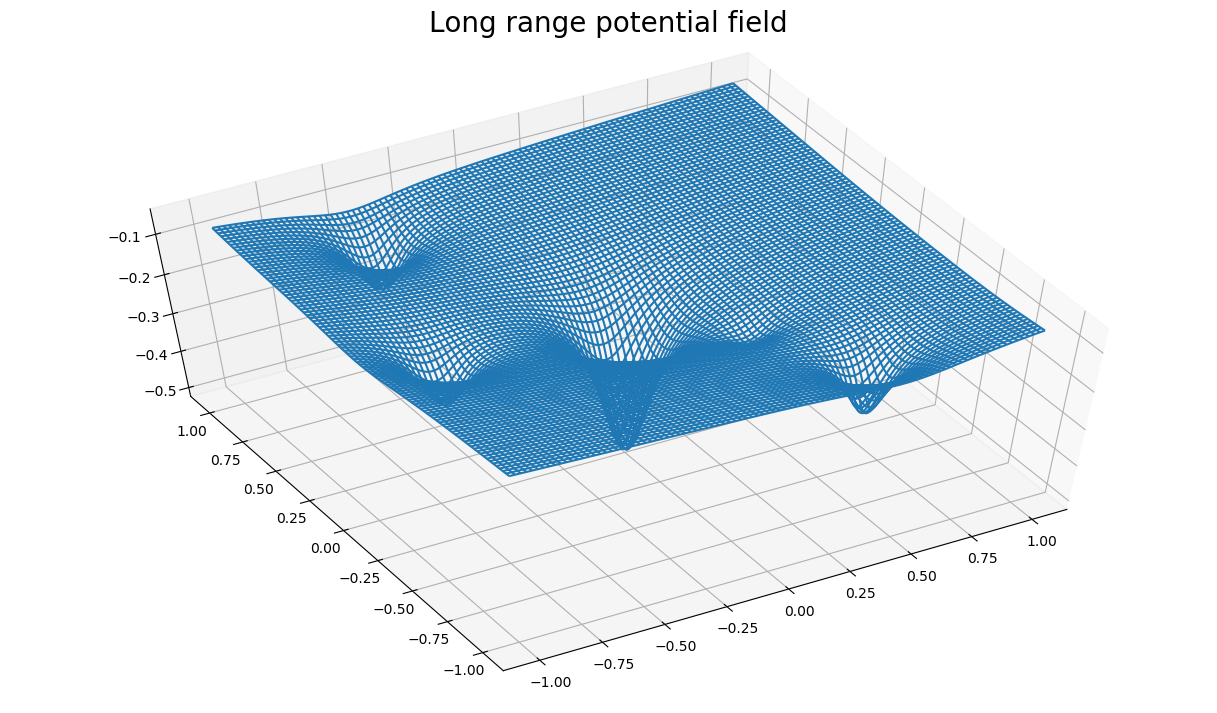

In [40]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=60.,azim=-120)

stride = 12

plt.title("Long range potential field",y=1.1,fontsize=20)
data  = lvpot
#data = np.log10(-data)

xs = ulz.mk_body_centered_linspace(-1,1,data.shape[1])
ys = ulz.mk_body_centered_linspace(-1,1,data.shape[0])
xs,ys = np.meshgrid(xs,ys)
zs = data

ax.plot_wireframe(xs,ys,zs,rstride=stride,cstride=stride)

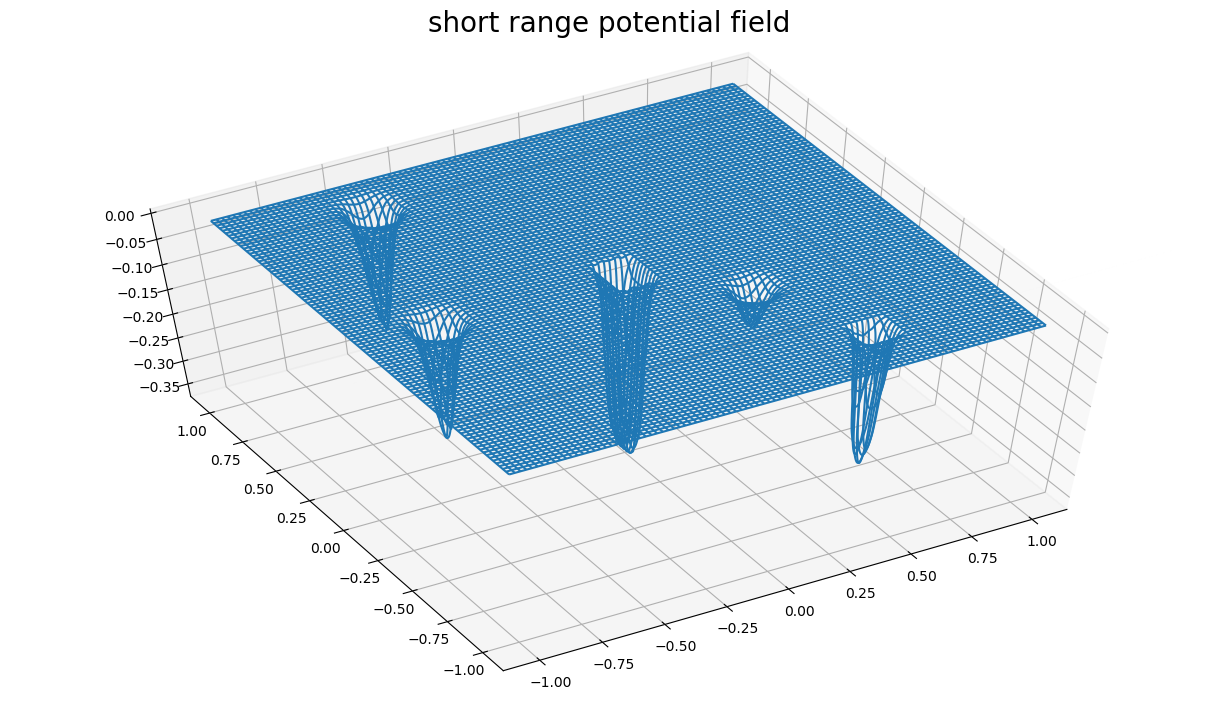

In [47]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=60.,azim=-120)

stride = 12

plt.title("short range potential field",y=1.1,fontsize=20)
data  = svpot

xs = ulz.mk_body_centered_linspace(-1,1,data.shape[1])
ys = ulz.mk_body_centered_linspace(-1,1,data.shape[0])
xs,ys = np.meshgrid(xs,ys)
zs = data

ax.plot_wireframe(xs,ys,zs,rstride=stride,cstride=stride)

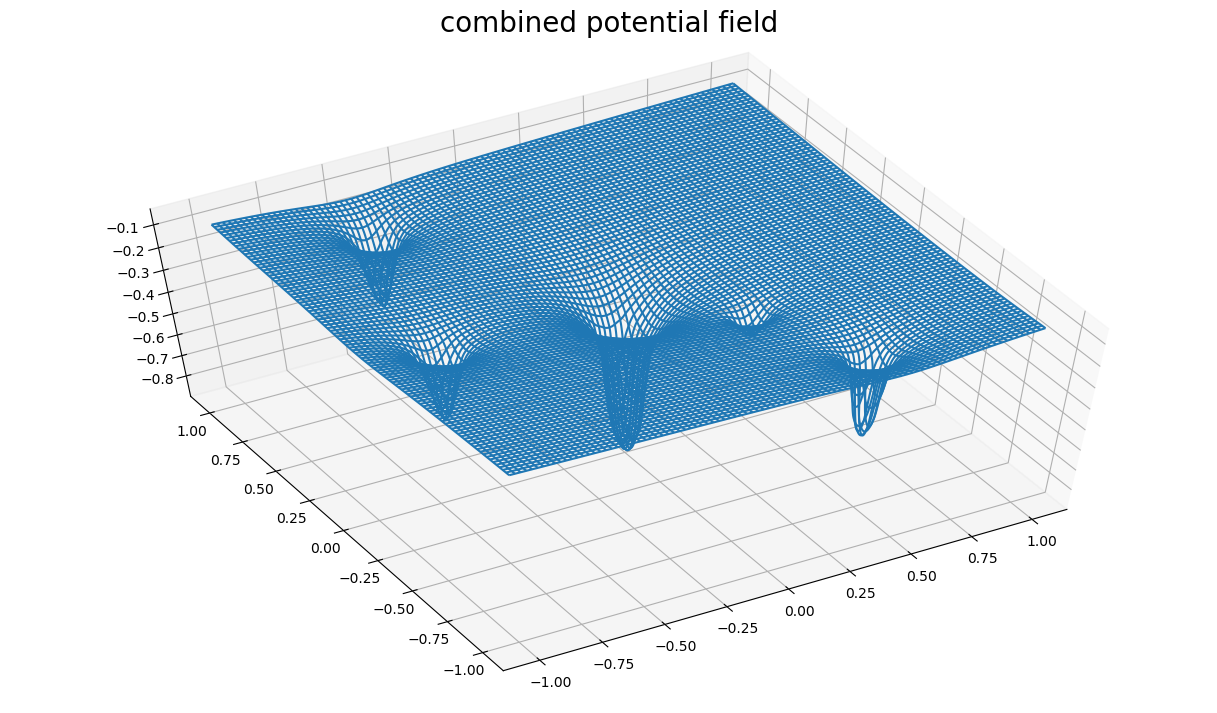

In [42]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=60.,azim=-120)

stride = 12

plt.title("combined potential field",y=1.1,fontsize=20)
data  = lvpot + svpot

xs = ulz.mk_body_centered_linspace(-1,1,data.shape[1])
ys = ulz.mk_body_centered_linspace(-1,1,data.shape[0])
xs,ys = np.meshgrid(xs,ys)
zs = data

ax.plot_wireframe(xs,ys,zs,rstride=stride,cstride=stride)

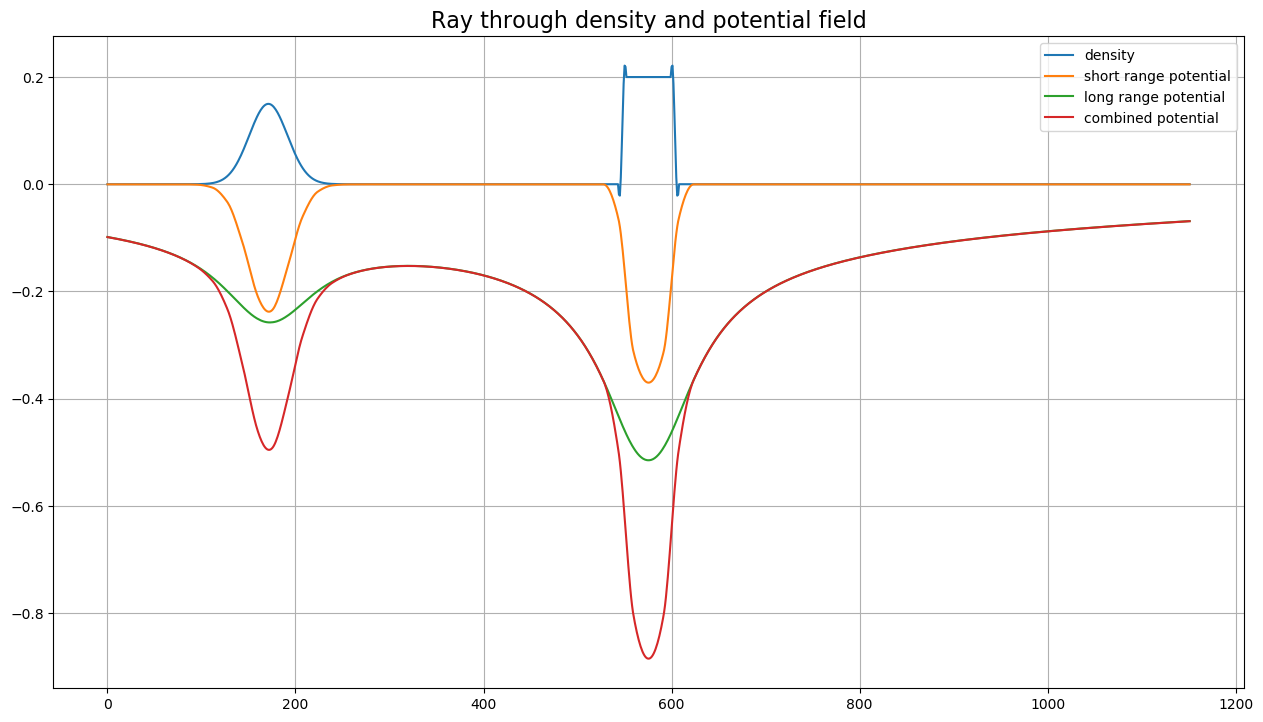

In [43]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)

doslice = lambda x: x[data.shape[0]//2,:]

plt.title("Ray through density and potential field",y=1.0,fontsize=16)

ls = '-'
plt.plot(doslice(0.1*dens),ls,label='density')
plt.plot(doslice(svpot),ls,label='short range potential')
plt.plot(doslice(lvpot),ls,label='long range potential')
plt.plot(doslice(svpot + lvpot),ls,label='combined potential')

#plt.ylim(-2,2)
plt.grid()
plt.legend()

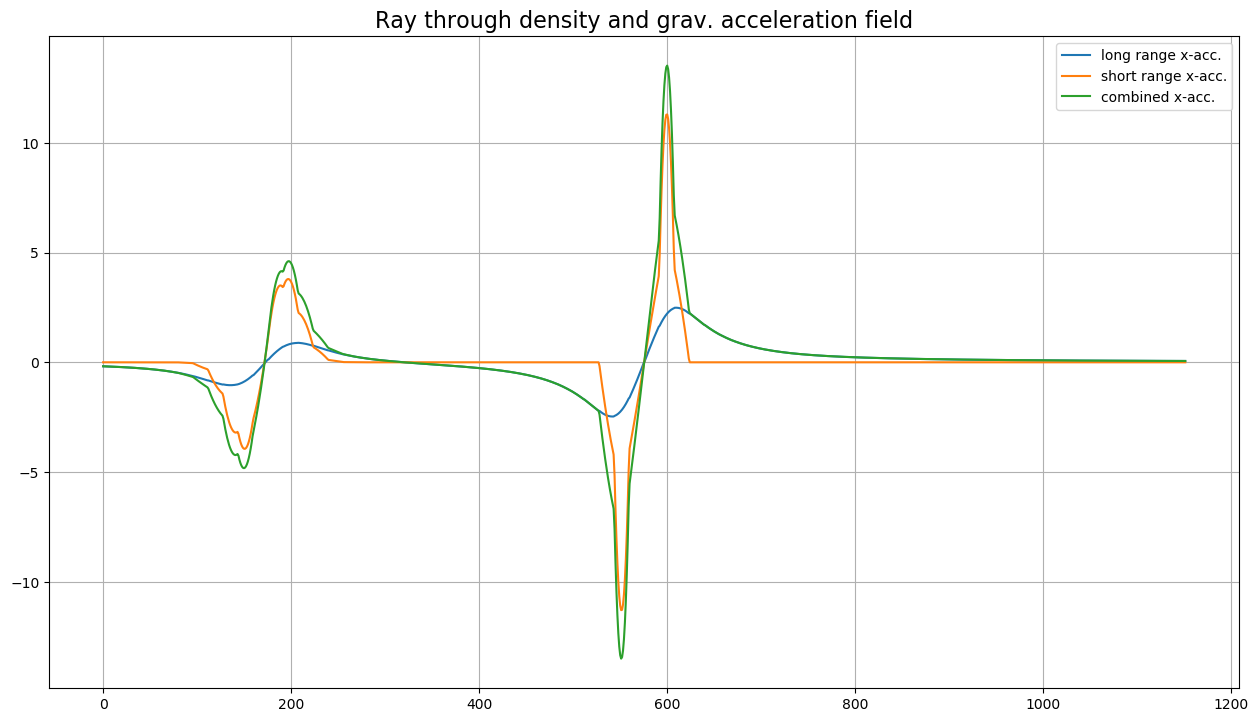

In [44]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)

plt.title("Ray through density and grav. acceleration field",y=1.0,fontsize=16)
ls = '-'

doslice = lambda x: x[data.shape[0]//2,:]

plt.plot(doslice(laccx),ls,label='long range x-acc.')
#plt.plot(doslice(laccy),ls,label='long range y-acc.')

plt.plot(doslice(saccx),ls,label='short range x-acc.')
#plt.plot(doslice(saccx),ls,label='short range y-acc')

plt.plot(doslice(laccx + saccx),ls,label='combined x-acc.')

#plt.ylim(-2,2)
plt.grid()
plt.legend()

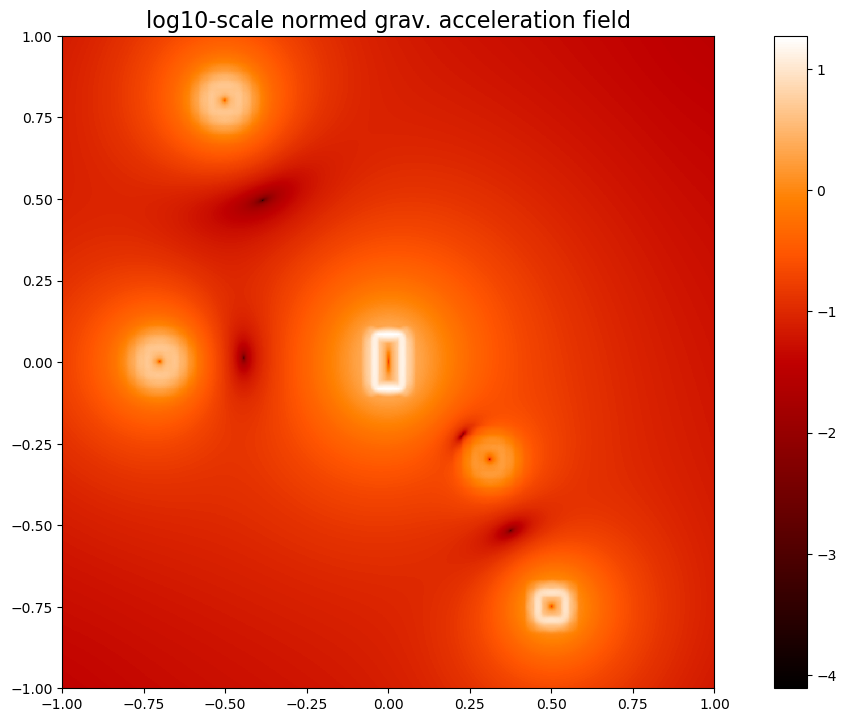

In [45]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)

data = acc
data = np.log10(data)

plt.title("log10-scale normed grav. acceleration field",y=1.0,fontsize=16)

plt.imshow(
    data,
    extent = extent,
    #vmin = 0,
    #vmax = 15,
    origin='lower',
    interpolation = None,
    cmap = plt.get_cmap('gist_heat'),
)
plt.colorbar()